In [1]:
pip install category_encoders

   ---------------------------------------- 0.0/85.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/85.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/85.7 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/85.7 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/85.7 kB ? eta -:--:--
   ------------------- -------------------- 41.0/85.7 kB 281.8 kB/s eta 0:00:01
   ------------------- -------------------- 41.0/85.7 kB 281.8 kB/s eta 0:00:01
   ---------------------------- ----------- 61.4/85.7 kB 233.8 kB/s eta 0:00:01
   ---------------------------- ----------- 61.4/85.7 kB 233.8 kB/s eta 0:00:01
   ---------------------------------------- 85.7/85.7 kB 241.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib.style as stl
import seaborn as sns
import category_encoders as ce

In [3]:
df = pd.read_csv("dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [ ]:
filler = df["Data_Value"].mean()
df["Data_Value"] = df["Data_Value"].fillna(filler)

In [ ]:
df["Data_Value"].isna().sum()

In [ ]:
df["Data_Value_Unit"].unique()

In [ ]:
df.drop("Data_Value_Unit", axis=1,inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
filler = df["Confidence_Limit_High"].mean()
df["Confidence_Limit_High"] = df["Confidence_Limit_High"].fillna(filler)

In [ ]:
df["Data_Value_Footnote"].unique()

In [ ]:
df.isna().sum()

In [ ]:
df.drop("Data_Value_Footnote_Symbol", axis=1,inplace=True)

In [ ]:
filler = df["Confidence_Limit_Low"].mean()
df["Confidence_Limit_Low"] = df["Confidence_Limit_Low"].fillna(filler)

In [ ]:
df.isna().sum()

In [ ]:
df.info()

In [ ]:
numerical=["Year","Data_Value","Data_Value_Alt","Confidence_Limit_Low","Confidence_Limit_High","LocationID"]

In [ ]:
import matplotlib.style as style
style.available

In [ ]:
style.use("ggplot")
for col in numerical:
    plt.figure(figsize=(12,6))
    sns.histplot(df[col],color="lime")
    plt.show()

In [ ]:
categoricals = []
for col in df.columns:
    if not col in numerical:
        categoricals.append(col)

In [ ]:
for col in categoricals:
    plt.figure(figsize=(12,8))
    sns.countplot(x=df[col])
    plt.show()

# Encoding..

In [ ]:
df.head()

In [ ]:
df.columns

# CountEncoding/Frequency

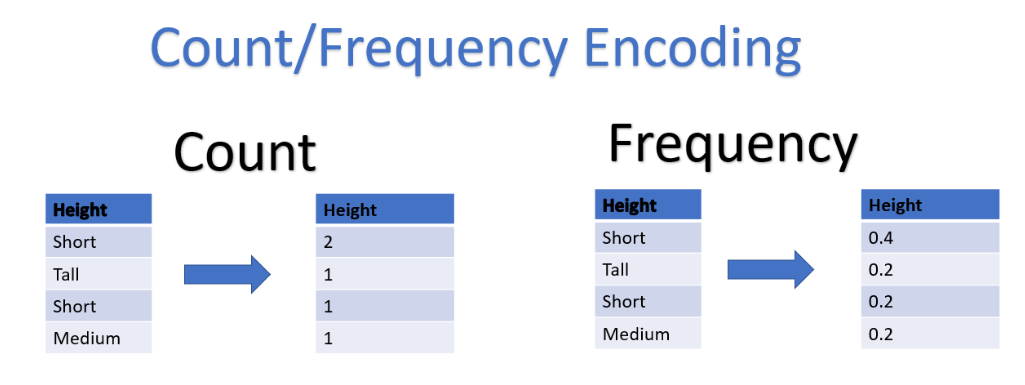

In [ ]:
enc = ce(normalize=True, cols=['Break_Out_Category', 'BreakoutCategoryID'])
data = enc.fit_transform(df)

In [ ]:
import category_encoders as ce
enc =ce.CountEncoder(normalize=True, cols=['Break_Out_Category', 'BreakoutCategoryID'])
# enc = ce(normalize=True, cols=['Break_Out_Category', 'BreakoutCategoryID'])
df = enc.fit_transform(df)

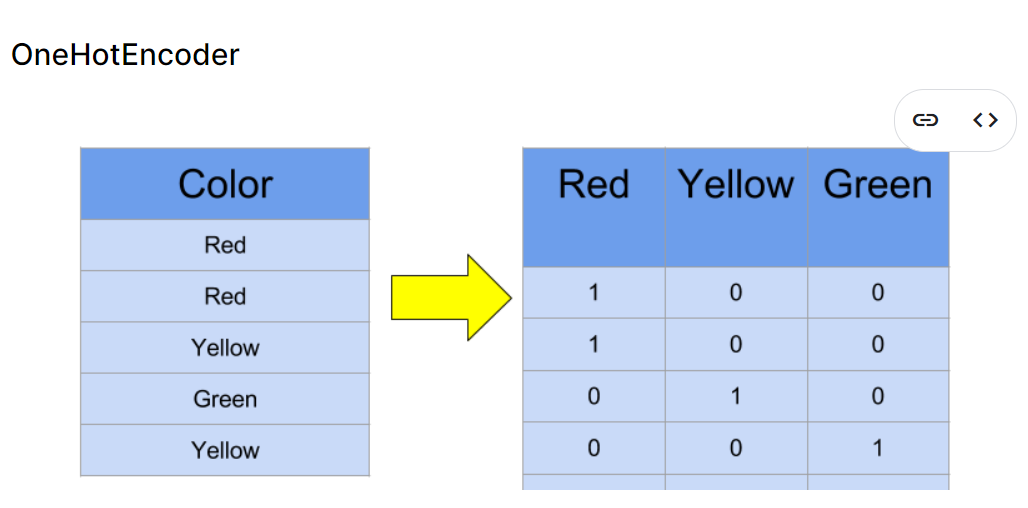

In [ ]:
from sklearn.preprocessing import OneHotEncoder

data= pd.get_dummies(df, columns = ['LocationAbbr', 'Datasource'])

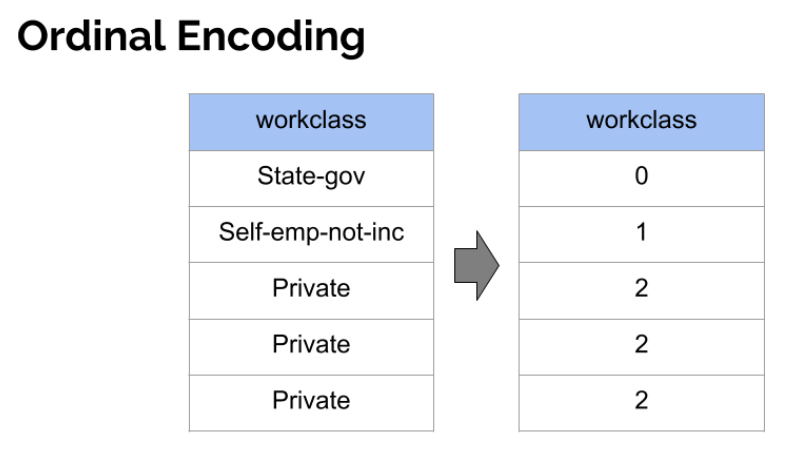

In [ ]:
import category_encoders as ce
ordenc=ce.OrdinalEncoder(cols=['LocationDesc','Topic'])
data=ordenc.fit_transform(data)

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.drop(["PriorityArea1","PriorityArea2","PriorityArea3","PriorityArea4"], axis=1, inplace=True)

In [ ]:
data.drop(["Data_Value_Footnote"], axis=1, inplace=True)

In [ ]:
data["Category"].unique()

In [ ]:
maap={"Cardiovascular Diseases":0,"Risk Factors":1}
for i in range(data.shape[0]):
    status=data["Category"][i]
    data["Category"][i]=maap[status]
    

In [ ]:
data["Category"].unique()

In [ ]:
data.head()

In [ ]:
map={"Age-Standardized":0,"Crude":1}
for i in range(data.shape[0]):
    status=data["Data_Value_Type"][i]
    data["Data_Value_Type"][i]=map[status]

In [ ]:
data["Data_Value_Type"].unique()

In [ ]:
import category_encoders as ce
ordenc=ce.OrdinalEncoder(cols=['Indicator','Data_Value_TypeID','GeoLocation','Break_out','BreakOutID','IndicatorID'])
data=ordenc.fit_transform(data)

In [ ]:
data.head()

In [ ]:
data.info()

#### remember the main steps when cleaning data:
* 1-Identify the problematic data
* .2-Clean the data
* .3-Remove, encode, fill in any missing data
* .4-Remove outliers or analyze them separately
* .5-Purge contaminated data and correct leaking pipelines
* .6-Standardize inconsistent data
* .7-Check if your data makes sense(is valid)
* .8-Deduplicate multiple records of the same dataForesee and prevent type issues (string issues, DateTime issues)
* .9-Remove engineering errors(aka structural errors)
* .10-Rinse and repeat

In [ ]:
df["is_canceled"].replace(["Yes","No"],[1,0],inplace = True)

In [ ]:
import seaborn as sns

In [ ]:
sns.get_dataset_names()

In [ ]:
df = sns.load_dataset("car_crashes")

In [ ]:
df.head()

In [ ]:
del df["abbrev"]

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mi = MinMaxScaler()

In [ ]:
df = mi.fit_transform(df)

In [ ]:
import pandas as pd
df1 = pd.DataFrame(df)

In [ ]:
df1.head()

In [ ]:
df = sns.load_dataset("car_crashes")

In [ ]:
del df["abbrev"]

In [ ]:
df.head(3)

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [ ]:
df = std.fit_transform(df)

In [ ]:
df1 = pd.DataFrame(df)

In [ ]:
df1.head()